# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

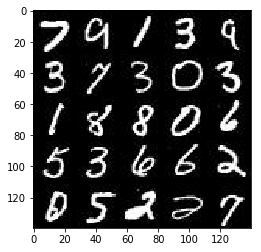

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

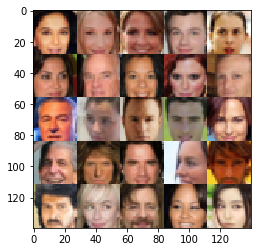

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
#     images = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "images")
#     z = tf.placeholder(tf.float32, (None, z_dim), "z")
#     learning_rate = tf.placeholder(tf.float32, name="learning_rate")
#     return images, z, learning_rate

    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), "inputs_real")
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="inputs_z")
    learning_rate = tf.placeholder(tf.float32, name="learning_rate")

    return inputs_real, inputs_z, learning_rate



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha = 0.2
    training = True
    x = images
    with tf.variable_scope('discriminator', reuse=reuse):

        x = tf.layers.conv2d(x, 64, 4, strides=2, padding="same")
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 128, 4, strides=1, padding="same")
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(alpha * x, x)
        
        x = tf.layers.conv2d(x, 256, 4, strides=2, padding="same")
        x = tf.layers.batch_normalization(x, training=training)
        x = tf.maximum(alpha * x, x)
        
        x = tf.reshape(x, (-1, 7*7*256))
        logits = tf.layers.dense(x, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope("generator", reuse=not is_train):
        x = tf.layers.dense(z, 7*7*256)
        x = tf.reshape(x, (-1, 7,7,256))
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        
#         x = tf.layers.conv2d_transpose(x, 256, 4, strides=2, padding="same")
#         x = tf.layers.batch_normalization(x, training=is_train)
#         x = tf.maximum(x*alpha, x)
        
        x = tf.layers.conv2d_transpose(x, 128, 4, strides=1, padding="same")
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        #14*14
        
        x = tf.layers.conv2d_transpose(x, 64, 4, strides=2, padding="same")
        x = tf.layers.batch_normalization(x, training=is_train)
        x = tf.maximum(x*alpha, x)
        #28*28
        
        #x = tf.layers.conv2d_transpose(x, 3, kernel_size = [5, 5], strides=1, padding="valid")
        logits = tf.layers.conv2d_transpose(x, out_channel_dim, 4, strides=2, padding="same")
        
        out = tf.tanh(logits)
        
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, image_width, image_height, image_channels = data_shape
    inputs_real, inputs_z, learn_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss, g_loss = model_loss(inputs_real, inputs_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z})
                _ = sess.run(g_opt, feed_dict={inputs_real: batch_images, inputs_z: batch_z})

                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({inputs_z: batch_z, inputs_real: batch_images})
                    train_loss_g = g_loss.eval({inputs_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, show_n_images, inputs_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.4466... Generator Loss: 1.3568
Epoch 1/2... Discriminator Loss: 0.3515... Generator Loss: 1.4930
Epoch 1/2... Discriminator Loss: 2.5066... Generator Loss: 0.1169
Epoch 1/2... Discriminator Loss: 0.3809... Generator Loss: 2.9376
Epoch 1/2... Discriminator Loss: 0.3151... Generator Loss: 2.0691
Epoch 1/2... Discriminator Loss: 0.3950... Generator Loss: 1.8293
Epoch 1/2... Discriminator Loss: 0.6782... Generator Loss: 1.4889
Epoch 1/2... Discriminator Loss: 0.5271... Generator Loss: 1.4818
Epoch 1/2... Discriminator Loss: 0.4376... Generator Loss: 2.0223
Epoch 1/2... Discriminator Loss: 1.1270... Generator Loss: 4.5304


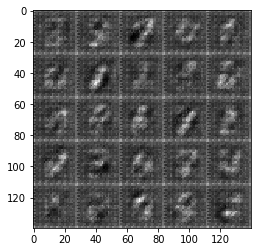

Epoch 1/2... Discriminator Loss: 0.4317... Generator Loss: 2.5216
Epoch 1/2... Discriminator Loss: 0.4165... Generator Loss: 2.5749
Epoch 1/2... Discriminator Loss: 0.3389... Generator Loss: 2.1123
Epoch 1/2... Discriminator Loss: 0.3434... Generator Loss: 2.1640
Epoch 1/2... Discriminator Loss: 0.4361... Generator Loss: 1.2045
Epoch 1/2... Discriminator Loss: 0.2510... Generator Loss: 1.9174
Epoch 1/2... Discriminator Loss: 0.1853... Generator Loss: 2.7672
Epoch 1/2... Discriminator Loss: 0.1603... Generator Loss: 2.3791
Epoch 1/2... Discriminator Loss: 0.1247... Generator Loss: 2.7559
Epoch 1/2... Discriminator Loss: 0.1049... Generator Loss: 3.0273


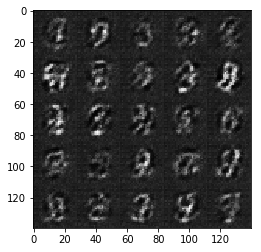

Epoch 1/2... Discriminator Loss: 0.1059... Generator Loss: 2.7147
Epoch 1/2... Discriminator Loss: 0.0756... Generator Loss: 3.5302
Epoch 1/2... Discriminator Loss: 0.0986... Generator Loss: 3.1120
Epoch 1/2... Discriminator Loss: 0.7232... Generator Loss: 1.1088
Epoch 1/2... Discriminator Loss: 0.2854... Generator Loss: 2.0757
Epoch 1/2... Discriminator Loss: 0.2908... Generator Loss: 1.7702
Epoch 1/2... Discriminator Loss: 0.2334... Generator Loss: 2.1716
Epoch 1/2... Discriminator Loss: 0.2483... Generator Loss: 2.0794
Epoch 1/2... Discriminator Loss: 0.3125... Generator Loss: 1.5758
Epoch 1/2... Discriminator Loss: 0.2898... Generator Loss: 1.9599


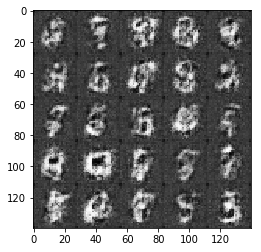

Epoch 1/2... Discriminator Loss: 0.3109... Generator Loss: 3.1897
Epoch 1/2... Discriminator Loss: 0.1891... Generator Loss: 2.2666
Epoch 1/2... Discriminator Loss: 0.1739... Generator Loss: 2.3227
Epoch 1/2... Discriminator Loss: 0.2057... Generator Loss: 2.1650
Epoch 1/2... Discriminator Loss: 0.1149... Generator Loss: 2.8957
Epoch 1/2... Discriminator Loss: 0.1342... Generator Loss: 2.5616
Epoch 1/2... Discriminator Loss: 0.1588... Generator Loss: 2.1951
Epoch 1/2... Discriminator Loss: 0.1126... Generator Loss: 2.6518
Epoch 1/2... Discriminator Loss: 0.1549... Generator Loss: 2.2190
Epoch 1/2... Discriminator Loss: 0.1239... Generator Loss: 2.4993


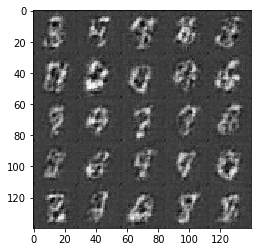

Epoch 1/2... Discriminator Loss: 0.1091... Generator Loss: 2.6779
Epoch 1/2... Discriminator Loss: 0.1444... Generator Loss: 2.3593
Epoch 1/2... Discriminator Loss: 0.1636... Generator Loss: 2.2682
Epoch 1/2... Discriminator Loss: 0.0883... Generator Loss: 2.9367
Epoch 1/2... Discriminator Loss: 0.1147... Generator Loss: 2.6141
Epoch 1/2... Discriminator Loss: 0.1238... Generator Loss: 2.6574
Epoch 1/2... Discriminator Loss: 0.1182... Generator Loss: 2.5751
Epoch 1/2... Discriminator Loss: 0.0783... Generator Loss: 3.1073
Epoch 1/2... Discriminator Loss: 0.0890... Generator Loss: 2.9333
Epoch 1/2... Discriminator Loss: 0.0747... Generator Loss: 3.3150


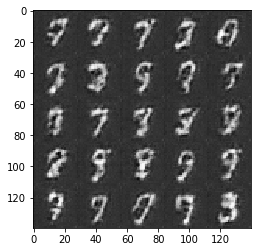

Epoch 1/2... Discriminator Loss: 0.2415... Generator Loss: 1.8872
Epoch 1/2... Discriminator Loss: 0.0540... Generator Loss: 3.4774
Epoch 1/2... Discriminator Loss: 0.0858... Generator Loss: 3.0763
Epoch 1/2... Discriminator Loss: 0.0679... Generator Loss: 3.2982
Epoch 1/2... Discriminator Loss: 0.1167... Generator Loss: 2.6312
Epoch 1/2... Discriminator Loss: 0.1531... Generator Loss: 2.3002
Epoch 1/2... Discriminator Loss: 0.0613... Generator Loss: 3.2879
Epoch 1/2... Discriminator Loss: 0.0455... Generator Loss: 3.7095
Epoch 1/2... Discriminator Loss: 0.0676... Generator Loss: 3.2497
Epoch 1/2... Discriminator Loss: 0.0448... Generator Loss: 4.7486


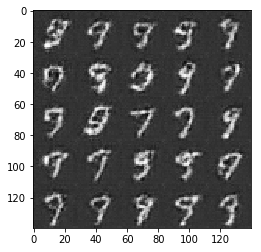

Epoch 1/2... Discriminator Loss: 0.0665... Generator Loss: 3.3145
Epoch 1/2... Discriminator Loss: 0.0617... Generator Loss: 3.4078
Epoch 1/2... Discriminator Loss: 0.0409... Generator Loss: 3.7422
Epoch 1/2... Discriminator Loss: 0.0475... Generator Loss: 3.6801
Epoch 1/2... Discriminator Loss: 0.0600... Generator Loss: 3.8580
Epoch 1/2... Discriminator Loss: 0.0320... Generator Loss: 4.2517
Epoch 1/2... Discriminator Loss: 0.1263... Generator Loss: 2.5049
Epoch 1/2... Discriminator Loss: 0.0456... Generator Loss: 3.6824
Epoch 1/2... Discriminator Loss: 0.0320... Generator Loss: 4.4634
Epoch 1/2... Discriminator Loss: 0.0417... Generator Loss: 3.7472


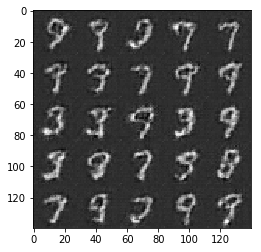

Epoch 1/2... Discriminator Loss: 0.0668... Generator Loss: 3.1886
Epoch 1/2... Discriminator Loss: 0.0485... Generator Loss: 3.6773
Epoch 1/2... Discriminator Loss: 0.0832... Generator Loss: 3.1872
Epoch 1/2... Discriminator Loss: 0.0262... Generator Loss: 4.4283
Epoch 1/2... Discriminator Loss: 0.0790... Generator Loss: 3.0878
Epoch 1/2... Discriminator Loss: 0.1743... Generator Loss: 2.3207
Epoch 1/2... Discriminator Loss: 0.1049... Generator Loss: 2.7858
Epoch 1/2... Discriminator Loss: 0.0200... Generator Loss: 4.7525
Epoch 1/2... Discriminator Loss: 0.0223... Generator Loss: 4.5838
Epoch 1/2... Discriminator Loss: 0.1609... Generator Loss: 2.3189


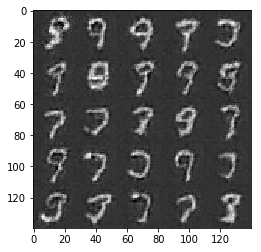

Epoch 1/2... Discriminator Loss: 0.7458... Generator Loss: 1.5147
Epoch 1/2... Discriminator Loss: 0.3613... Generator Loss: 2.9099
Epoch 1/2... Discriminator Loss: 0.2995... Generator Loss: 2.0534
Epoch 1/2... Discriminator Loss: 0.2065... Generator Loss: 2.4870
Epoch 1/2... Discriminator Loss: 0.1300... Generator Loss: 3.0069
Epoch 1/2... Discriminator Loss: 0.1114... Generator Loss: 2.9349
Epoch 1/2... Discriminator Loss: 0.0964... Generator Loss: 3.1575
Epoch 1/2... Discriminator Loss: 0.0879... Generator Loss: 3.4853
Epoch 1/2... Discriminator Loss: 0.1105... Generator Loss: 2.9024
Epoch 1/2... Discriminator Loss: 0.0739... Generator Loss: 3.8218


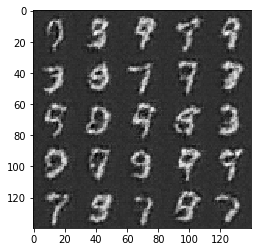

Epoch 1/2... Discriminator Loss: 0.0904... Generator Loss: 3.1868
Epoch 1/2... Discriminator Loss: 0.1321... Generator Loss: 2.6194
Epoch 1/2... Discriminator Loss: 0.1308... Generator Loss: 2.6128
Epoch 2/2... Discriminator Loss: 0.1081... Generator Loss: 2.7935
Epoch 2/2... Discriminator Loss: 0.0504... Generator Loss: 3.6905
Epoch 2/2... Discriminator Loss: 0.0967... Generator Loss: 2.8016
Epoch 2/2... Discriminator Loss: 0.0754... Generator Loss: 3.6122
Epoch 2/2... Discriminator Loss: 0.0562... Generator Loss: 3.4975
Epoch 2/2... Discriminator Loss: 0.0402... Generator Loss: 4.3972
Epoch 2/2... Discriminator Loss: 0.0724... Generator Loss: 3.5038


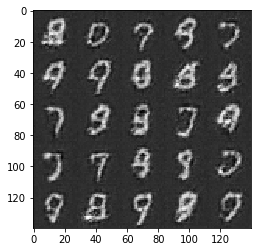

Epoch 2/2... Discriminator Loss: 0.0728... Generator Loss: 3.1922
Epoch 2/2... Discriminator Loss: 0.0668... Generator Loss: 3.3983
Epoch 2/2... Discriminator Loss: 0.0685... Generator Loss: 3.5333
Epoch 2/2... Discriminator Loss: 0.0745... Generator Loss: 3.3886
Epoch 2/2... Discriminator Loss: 0.0160... Generator Loss: 5.3059
Epoch 2/2... Discriminator Loss: 0.0615... Generator Loss: 3.4133
Epoch 2/2... Discriminator Loss: 0.0203... Generator Loss: 6.1412
Epoch 2/2... Discriminator Loss: 0.0930... Generator Loss: 3.0203
Epoch 2/2... Discriminator Loss: 0.5630... Generator Loss: 2.3771
Epoch 2/2... Discriminator Loss: 0.3382... Generator Loss: 2.3087


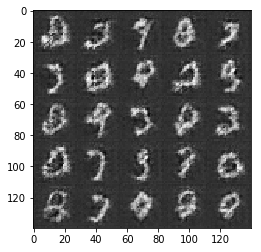

Epoch 2/2... Discriminator Loss: 0.2836... Generator Loss: 2.4993
Epoch 2/2... Discriminator Loss: 0.2554... Generator Loss: 3.1188
Epoch 2/2... Discriminator Loss: 0.2022... Generator Loss: 2.5713
Epoch 2/2... Discriminator Loss: 0.1013... Generator Loss: 2.9846
Epoch 2/2... Discriminator Loss: 0.1784... Generator Loss: 2.4728
Epoch 2/2... Discriminator Loss: 0.1049... Generator Loss: 3.8212
Epoch 2/2... Discriminator Loss: 0.0815... Generator Loss: 3.1656
Epoch 2/2... Discriminator Loss: 0.1293... Generator Loss: 2.6028
Epoch 2/2... Discriminator Loss: 0.0596... Generator Loss: 3.6477
Epoch 2/2... Discriminator Loss: 0.1443... Generator Loss: 2.5830


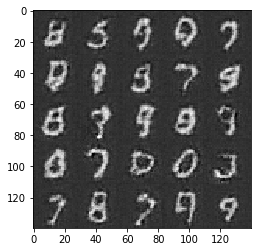

Epoch 2/2... Discriminator Loss: 0.0577... Generator Loss: 3.6999
Epoch 2/2... Discriminator Loss: 0.0799... Generator Loss: 3.0688
Epoch 2/2... Discriminator Loss: 0.0987... Generator Loss: 2.8224
Epoch 2/2... Discriminator Loss: 0.1008... Generator Loss: 2.9264
Epoch 2/2... Discriminator Loss: 0.0386... Generator Loss: 4.1117
Epoch 2/2... Discriminator Loss: 0.0110... Generator Loss: 6.0102
Epoch 2/2... Discriminator Loss: 0.0416... Generator Loss: 4.1272
Epoch 2/2... Discriminator Loss: 0.0497... Generator Loss: 3.6746
Epoch 2/2... Discriminator Loss: 0.0708... Generator Loss: 3.4396
Epoch 2/2... Discriminator Loss: 0.0158... Generator Loss: 5.3596


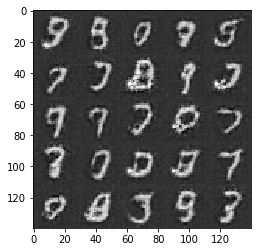

Epoch 2/2... Discriminator Loss: 0.0619... Generator Loss: 3.5166
Epoch 2/2... Discriminator Loss: 0.0582... Generator Loss: 3.5413
Epoch 2/2... Discriminator Loss: 0.0377... Generator Loss: 4.1979
Epoch 2/2... Discriminator Loss: 0.0368... Generator Loss: 3.9508
Epoch 2/2... Discriminator Loss: 0.0164... Generator Loss: 5.4325
Epoch 2/2... Discriminator Loss: 0.0250... Generator Loss: 4.9691
Epoch 2/2... Discriminator Loss: 0.0590... Generator Loss: 3.5660
Epoch 2/2... Discriminator Loss: 0.0521... Generator Loss: 3.9019
Epoch 2/2... Discriminator Loss: 0.0176... Generator Loss: 5.5896
Epoch 2/2... Discriminator Loss: 0.0477... Generator Loss: 3.8866


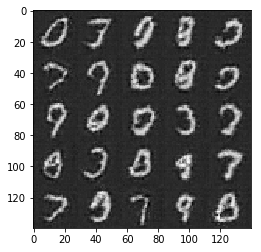

Epoch 2/2... Discriminator Loss: 0.0405... Generator Loss: 3.7583
Epoch 2/2... Discriminator Loss: 0.0311... Generator Loss: 4.1166
Epoch 2/2... Discriminator Loss: 0.0486... Generator Loss: 4.1549
Epoch 2/2... Discriminator Loss: 0.0662... Generator Loss: 3.3321
Epoch 2/2... Discriminator Loss: 0.0430... Generator Loss: 3.9628
Epoch 2/2... Discriminator Loss: 0.0480... Generator Loss: 3.7162
Epoch 2/2... Discriminator Loss: 1.8186... Generator Loss: 0.4662
Epoch 2/2... Discriminator Loss: 0.5636... Generator Loss: 1.7488
Epoch 2/2... Discriminator Loss: 0.4902... Generator Loss: 1.6483
Epoch 2/2... Discriminator Loss: 0.2950... Generator Loss: 2.2395


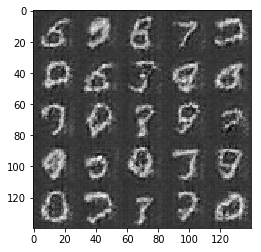

Epoch 2/2... Discriminator Loss: 0.2669... Generator Loss: 1.9994
Epoch 2/2... Discriminator Loss: 0.4129... Generator Loss: 1.4056
Epoch 2/2... Discriminator Loss: 0.1248... Generator Loss: 3.0213
Epoch 2/2... Discriminator Loss: 0.1495... Generator Loss: 2.8067
Epoch 2/2... Discriminator Loss: 0.3961... Generator Loss: 1.4116
Epoch 2/2... Discriminator Loss: 2.4141... Generator Loss: 5.8779
Epoch 2/2... Discriminator Loss: 0.5469... Generator Loss: 2.1148
Epoch 2/2... Discriminator Loss: 0.4818... Generator Loss: 1.7919
Epoch 2/2... Discriminator Loss: 0.6134... Generator Loss: 1.5984
Epoch 2/2... Discriminator Loss: 0.7201... Generator Loss: 2.2068


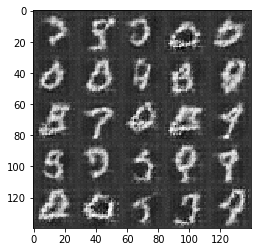

Epoch 2/2... Discriminator Loss: 0.7019... Generator Loss: 1.4614
Epoch 2/2... Discriminator Loss: 0.7992... Generator Loss: 1.0579
Epoch 2/2... Discriminator Loss: 0.8992... Generator Loss: 0.7839
Epoch 2/2... Discriminator Loss: 0.9949... Generator Loss: 3.0053
Epoch 2/2... Discriminator Loss: 0.6041... Generator Loss: 2.2406
Epoch 2/2... Discriminator Loss: 0.4981... Generator Loss: 2.8457
Epoch 2/2... Discriminator Loss: 0.3677... Generator Loss: 2.3902
Epoch 2/2... Discriminator Loss: 0.3285... Generator Loss: 2.6496
Epoch 2/2... Discriminator Loss: 0.3274... Generator Loss: 2.1098
Epoch 2/2... Discriminator Loss: 0.1919... Generator Loss: 3.1233


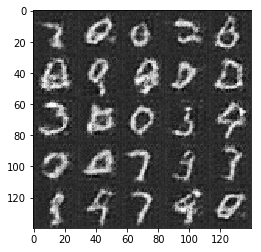

Epoch 2/2... Discriminator Loss: 0.1745... Generator Loss: 3.0413
Epoch 2/2... Discriminator Loss: 0.2326... Generator Loss: 2.8164
Epoch 2/2... Discriminator Loss: 0.1685... Generator Loss: 3.0404
Epoch 2/2... Discriminator Loss: 0.2093... Generator Loss: 3.6710
Epoch 2/2... Discriminator Loss: 0.2141... Generator Loss: 2.1140
Epoch 2/2... Discriminator Loss: 0.1173... Generator Loss: 3.0878
Epoch 2/2... Discriminator Loss: 0.1414... Generator Loss: 2.6091
Epoch 2/2... Discriminator Loss: 0.1720... Generator Loss: 2.5188
Epoch 2/2... Discriminator Loss: 0.1172... Generator Loss: 2.8505
Epoch 2/2... Discriminator Loss: 0.1210... Generator Loss: 3.1956


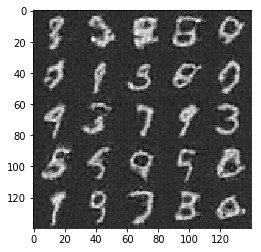

Epoch 2/2... Discriminator Loss: 0.1073... Generator Loss: 3.3883
Epoch 2/2... Discriminator Loss: 0.2343... Generator Loss: 1.8097
Epoch 2/2... Discriminator Loss: 0.1296... Generator Loss: 2.8419
Epoch 2/2... Discriminator Loss: 0.3529... Generator Loss: 1.5829
Epoch 2/2... Discriminator Loss: 0.0648... Generator Loss: 3.5657
Epoch 2/2... Discriminator Loss: 0.0932... Generator Loss: 3.3103
Epoch 2/2... Discriminator Loss: 0.1026... Generator Loss: 2.8121


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.7157... Generator Loss: 0.9744
Epoch 1/1... Discriminator Loss: 0.8523... Generator Loss: 0.8301
Epoch 1/1... Discriminator Loss: 1.8834... Generator Loss: 7.8249
Epoch 1/1... Discriminator Loss: 1.1739... Generator Loss: 8.6305
Epoch 1/1... Discriminator Loss: 0.5879... Generator Loss: 1.7226
Epoch 1/1... Discriminator Loss: 0.3045... Generator Loss: 2.3674
Epoch 1/1... Discriminator Loss: 0.1960... Generator Loss: 3.9760
Epoch 1/1... Discriminator Loss: 0.1702... Generator Loss: 2.7139
Epoch 1/1... Discriminator Loss: 0.1864... Generator Loss: 2.0432
Epoch 1/1... Discriminator Loss: 0.2090... Generator Loss: 3.5862


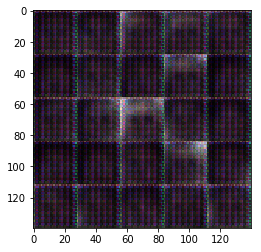

Epoch 1/1... Discriminator Loss: 0.7429... Generator Loss: 1.0819
Epoch 1/1... Discriminator Loss: 0.2035... Generator Loss: 2.3334
Epoch 1/1... Discriminator Loss: 2.7603... Generator Loss: 5.7680
Epoch 1/1... Discriminator Loss: 0.2189... Generator Loss: 2.4196
Epoch 1/1... Discriminator Loss: 0.1709... Generator Loss: 3.0804
Epoch 1/1... Discriminator Loss: 2.2854... Generator Loss: 7.4944
Epoch 1/1... Discriminator Loss: 0.7026... Generator Loss: 1.7095
Epoch 1/1... Discriminator Loss: 0.4054... Generator Loss: 6.9293
Epoch 1/1... Discriminator Loss: 0.2674... Generator Loss: 4.0456
Epoch 1/1... Discriminator Loss: 0.3224... Generator Loss: 3.8426


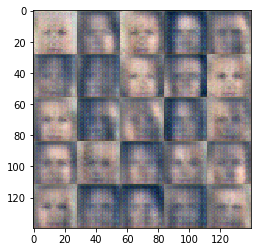

Epoch 1/1... Discriminator Loss: 0.1214... Generator Loss: 6.4520
Epoch 1/1... Discriminator Loss: 3.3919... Generator Loss: 3.4102
Epoch 1/1... Discriminator Loss: 0.0695... Generator Loss: 5.6005
Epoch 1/1... Discriminator Loss: 0.0415... Generator Loss: 6.3704
Epoch 1/1... Discriminator Loss: 0.4923... Generator Loss: 8.1558
Epoch 1/1... Discriminator Loss: 0.0359... Generator Loss: 4.6351
Epoch 1/1... Discriminator Loss: 0.2369... Generator Loss: 1.9410
Epoch 1/1... Discriminator Loss: 0.2884... Generator Loss: 10.2601
Epoch 1/1... Discriminator Loss: 0.0489... Generator Loss: 5.9207
Epoch 1/1... Discriminator Loss: 0.0481... Generator Loss: 8.0844


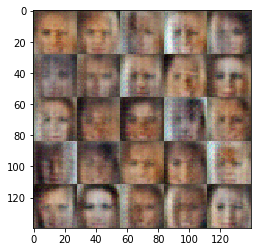

Epoch 1/1... Discriminator Loss: 0.0848... Generator Loss: 6.3125
Epoch 1/1... Discriminator Loss: 0.0328... Generator Loss: 5.5091
Epoch 1/1... Discriminator Loss: 0.1101... Generator Loss: 3.2254
Epoch 1/1... Discriminator Loss: 0.7281... Generator Loss: 0.8778
Epoch 1/1... Discriminator Loss: 0.0507... Generator Loss: 6.3335
Epoch 1/1... Discriminator Loss: 0.1426... Generator Loss: 4.1593
Epoch 1/1... Discriminator Loss: 1.5355... Generator Loss: 5.6204
Epoch 1/1... Discriminator Loss: 0.4328... Generator Loss: 4.4934
Epoch 1/1... Discriminator Loss: 0.6901... Generator Loss: 0.8758
Epoch 1/1... Discriminator Loss: 0.2569... Generator Loss: 1.9643


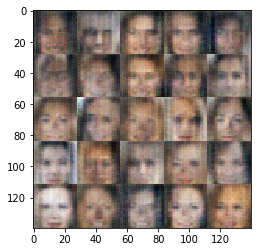

Epoch 1/1... Discriminator Loss: 0.3707... Generator Loss: 1.7928
Epoch 1/1... Discriminator Loss: 0.1021... Generator Loss: 4.0834
Epoch 1/1... Discriminator Loss: 2.2881... Generator Loss: 10.4763
Epoch 1/1... Discriminator Loss: 0.5687... Generator Loss: 1.1562
Epoch 1/1... Discriminator Loss: 0.1191... Generator Loss: 3.5834
Epoch 1/1... Discriminator Loss: 0.2028... Generator Loss: 5.3506
Epoch 1/1... Discriminator Loss: 0.3423... Generator Loss: 9.5910
Epoch 1/1... Discriminator Loss: 0.0821... Generator Loss: 5.5794
Epoch 1/1... Discriminator Loss: 0.0419... Generator Loss: 4.6138
Epoch 1/1... Discriminator Loss: 0.2499... Generator Loss: 2.0427


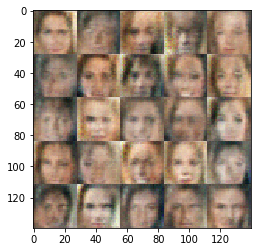

Epoch 1/1... Discriminator Loss: 3.0370... Generator Loss: 7.1742
Epoch 1/1... Discriminator Loss: 0.2714... Generator Loss: 2.1529
Epoch 1/1... Discriminator Loss: 0.0867... Generator Loss: 4.7582
Epoch 1/1... Discriminator Loss: 0.6358... Generator Loss: 1.1052
Epoch 1/1... Discriminator Loss: 0.0754... Generator Loss: 6.4668
Epoch 1/1... Discriminator Loss: 0.0703... Generator Loss: 4.1681
Epoch 1/1... Discriminator Loss: 0.0949... Generator Loss: 7.6771
Epoch 1/1... Discriminator Loss: 0.0885... Generator Loss: 7.5926
Epoch 1/1... Discriminator Loss: 0.0470... Generator Loss: 5.9000
Epoch 1/1... Discriminator Loss: 0.2867... Generator Loss: 5.1641


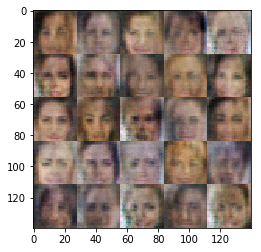

Epoch 1/1... Discriminator Loss: 0.1232... Generator Loss: 8.8459
Epoch 1/1... Discriminator Loss: 0.0639... Generator Loss: 5.9326
Epoch 1/1... Discriminator Loss: 0.0513... Generator Loss: 4.6350
Epoch 1/1... Discriminator Loss: 0.0645... Generator Loss: 8.1283
Epoch 1/1... Discriminator Loss: 0.4148... Generator Loss: 1.5838
Epoch 1/1... Discriminator Loss: 0.4141... Generator Loss: 6.3257
Epoch 1/1... Discriminator Loss: 0.3540... Generator Loss: 1.6612
Epoch 1/1... Discriminator Loss: 0.0320... Generator Loss: 6.1816
Epoch 1/1... Discriminator Loss: 0.2572... Generator Loss: 10.5943
Epoch 1/1... Discriminator Loss: 0.0550... Generator Loss: 5.4025


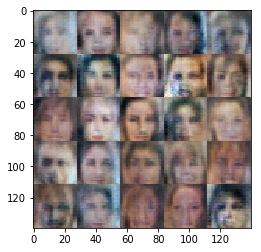

Epoch 1/1... Discriminator Loss: 0.4800... Generator Loss: 6.8654
Epoch 1/1... Discriminator Loss: 0.1748... Generator Loss: 3.5528
Epoch 1/1... Discriminator Loss: 2.1031... Generator Loss: 0.2366
Epoch 1/1... Discriminator Loss: 1.3039... Generator Loss: 0.6192
Epoch 1/1... Discriminator Loss: 0.1110... Generator Loss: 4.7385
Epoch 1/1... Discriminator Loss: 0.2587... Generator Loss: 1.9970
Epoch 1/1... Discriminator Loss: 0.0657... Generator Loss: 7.8048
Epoch 1/1... Discriminator Loss: 0.0876... Generator Loss: 10.8798
Epoch 1/1... Discriminator Loss: 0.0604... Generator Loss: 4.3982
Epoch 1/1... Discriminator Loss: 0.0848... Generator Loss: 4.1146


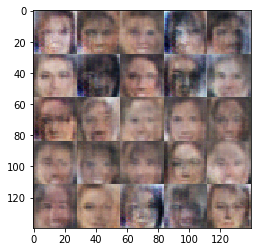

Epoch 1/1... Discriminator Loss: 0.0267... Generator Loss: 8.3445
Epoch 1/1... Discriminator Loss: 0.0465... Generator Loss: 6.7779
Epoch 1/1... Discriminator Loss: 0.0364... Generator Loss: 5.7771
Epoch 1/1... Discriminator Loss: 0.3872... Generator Loss: 1.6285
Epoch 1/1... Discriminator Loss: 0.0932... Generator Loss: 3.2558
Epoch 1/1... Discriminator Loss: 0.4492... Generator Loss: 3.5691
Epoch 1/1... Discriminator Loss: 0.0611... Generator Loss: 6.3177
Epoch 1/1... Discriminator Loss: 4.6976... Generator Loss: 8.8880
Epoch 1/1... Discriminator Loss: 0.6243... Generator Loss: 1.3310
Epoch 1/1... Discriminator Loss: 0.1876... Generator Loss: 2.5472


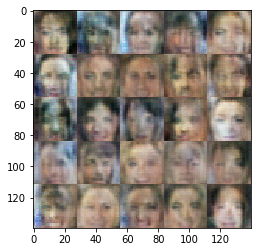

Epoch 1/1... Discriminator Loss: 0.3916... Generator Loss: 1.4278
Epoch 1/1... Discriminator Loss: 0.0606... Generator Loss: 5.8975
Epoch 1/1... Discriminator Loss: 0.4661... Generator Loss: 1.6458
Epoch 1/1... Discriminator Loss: 0.0265... Generator Loss: 7.9050
Epoch 1/1... Discriminator Loss: 0.2713... Generator Loss: 2.0027
Epoch 1/1... Discriminator Loss: 0.3777... Generator Loss: 1.5253
Epoch 1/1... Discriminator Loss: 0.0228... Generator Loss: 5.9178
Epoch 1/1... Discriminator Loss: 0.1308... Generator Loss: 11.0899
Epoch 1/1... Discriminator Loss: 0.0393... Generator Loss: 11.7683
Epoch 1/1... Discriminator Loss: 0.0943... Generator Loss: 3.9782


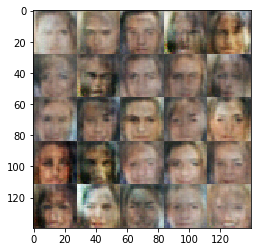

Epoch 1/1... Discriminator Loss: 0.1333... Generator Loss: 13.6428
Epoch 1/1... Discriminator Loss: 0.0912... Generator Loss: 8.5685
Epoch 1/1... Discriminator Loss: 0.1359... Generator Loss: 2.8225
Epoch 1/1... Discriminator Loss: 0.1039... Generator Loss: 3.2466
Epoch 1/1... Discriminator Loss: 10.7766... Generator Loss: 12.5774
Epoch 1/1... Discriminator Loss: 1.6304... Generator Loss: 2.3666
Epoch 1/1... Discriminator Loss: 0.7815... Generator Loss: 2.4280
Epoch 1/1... Discriminator Loss: 0.7020... Generator Loss: 1.3679
Epoch 1/1... Discriminator Loss: 0.7388... Generator Loss: 1.1101
Epoch 1/1... Discriminator Loss: 0.3737... Generator Loss: 1.9129


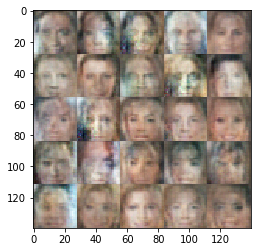

Epoch 1/1... Discriminator Loss: 0.4678... Generator Loss: 1.5068
Epoch 1/1... Discriminator Loss: 3.0081... Generator Loss: 0.1065
Epoch 1/1... Discriminator Loss: 0.1457... Generator Loss: 2.9689
Epoch 1/1... Discriminator Loss: 0.7087... Generator Loss: 0.8759
Epoch 1/1... Discriminator Loss: 0.4815... Generator Loss: 6.4565
Epoch 1/1... Discriminator Loss: 0.6057... Generator Loss: 1.1165
Epoch 1/1... Discriminator Loss: 0.0716... Generator Loss: 11.4920
Epoch 1/1... Discriminator Loss: 0.1569... Generator Loss: 5.6920
Epoch 1/1... Discriminator Loss: 0.0455... Generator Loss: 6.5450
Epoch 1/1... Discriminator Loss: 0.0343... Generator Loss: 7.8496


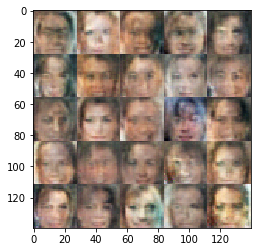

Epoch 1/1... Discriminator Loss: 0.5967... Generator Loss: 1.1254
Epoch 1/1... Discriminator Loss: 0.0646... Generator Loss: 7.0573
Epoch 1/1... Discriminator Loss: 0.9766... Generator Loss: 0.6249
Epoch 1/1... Discriminator Loss: 0.9419... Generator Loss: 1.1515
Epoch 1/1... Discriminator Loss: 0.4992... Generator Loss: 2.2699
Epoch 1/1... Discriminator Loss: 0.6800... Generator Loss: 1.1996
Epoch 1/1... Discriminator Loss: 1.4329... Generator Loss: 0.3848
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 3.9592
Epoch 1/1... Discriminator Loss: 0.5394... Generator Loss: 1.3924
Epoch 1/1... Discriminator Loss: 0.7938... Generator Loss: 0.8157


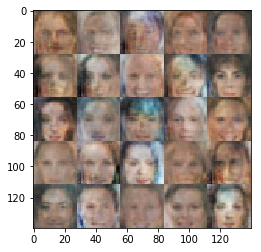

Epoch 1/1... Discriminator Loss: 0.1832... Generator Loss: 6.8230
Epoch 1/1... Discriminator Loss: 0.0994... Generator Loss: 6.3442
Epoch 1/1... Discriminator Loss: 0.0731... Generator Loss: 4.3924
Epoch 1/1... Discriminator Loss: 0.1847... Generator Loss: 2.5759
Epoch 1/1... Discriminator Loss: 1.9978... Generator Loss: 0.2595
Epoch 1/1... Discriminator Loss: 1.0796... Generator Loss: 0.7107
Epoch 1/1... Discriminator Loss: 0.2133... Generator Loss: 6.0786
Epoch 1/1... Discriminator Loss: 0.6846... Generator Loss: 0.9216
Epoch 1/1... Discriminator Loss: 0.5724... Generator Loss: 6.5843
Epoch 1/1... Discriminator Loss: 0.0252... Generator Loss: 5.7325


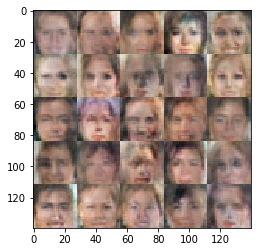

Epoch 1/1... Discriminator Loss: 0.0918... Generator Loss: 5.3929
Epoch 1/1... Discriminator Loss: 0.0444... Generator Loss: 6.5172
Epoch 1/1... Discriminator Loss: 2.4037... Generator Loss: 7.6611
Epoch 1/1... Discriminator Loss: 0.9849... Generator Loss: 1.6492
Epoch 1/1... Discriminator Loss: 0.6725... Generator Loss: 3.1053
Epoch 1/1... Discriminator Loss: 0.2458... Generator Loss: 4.6343
Epoch 1/1... Discriminator Loss: 0.1664... Generator Loss: 4.6621
Epoch 1/1... Discriminator Loss: 0.3840... Generator Loss: 2.9595
Epoch 1/1... Discriminator Loss: 0.5133... Generator Loss: 2.4565
Epoch 1/1... Discriminator Loss: 0.3377... Generator Loss: 2.0662


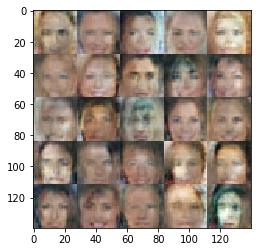

Epoch 1/1... Discriminator Loss: 0.1458... Generator Loss: 3.7963
Epoch 1/1... Discriminator Loss: 0.3723... Generator Loss: 4.7120
Epoch 1/1... Discriminator Loss: 0.5328... Generator Loss: 1.3496
Epoch 1/1... Discriminator Loss: 0.6743... Generator Loss: 1.9586
Epoch 1/1... Discriminator Loss: 0.2543... Generator Loss: 2.2109
Epoch 1/1... Discriminator Loss: 0.1294... Generator Loss: 3.1613
Epoch 1/1... Discriminator Loss: 0.6407... Generator Loss: 0.9479
Epoch 1/1... Discriminator Loss: 0.0411... Generator Loss: 5.6196


In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.0004
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.